## Notebook using the permuted model for the aliency maps

In [4]:
from torch.utils import data
import torchvision
from models.grad_cam import CNN_grad_cam, display_datasets_heatmap
import torch
import torchvision.transforms as transforms


In [3]:
model_permuted = torch.load('models/model_permuted.pth')

In [6]:
mean0 =torch.tensor([0.5832, 0.5832, 0.5832])
std0  =torch.tensor([0.1413, 0.1413, 0.1413])
std_normalise_0 = transforms.Normalize(
    mean=mean0,
    std=std0
)
trans0 = transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.Grayscale(num_output_channels=3),
        transforms.ToTensor(),
        std_normalise_0
])

In [7]:
data_for_grad_cam = torchvision.datasets.ImageFolder('archive/chest_xray/plot_grad_cam', transform=trans0)
dataloader_grad_cam = data.DataLoader(data_for_grad_cam, shuffle=False, batch_size=1)

In [8]:
grad_cam_model = CNN_grad_cam(model_permuted)

1 0
1 0
1 0
0 0
1 0
1 1
1 1
1 1
0 1
0 1


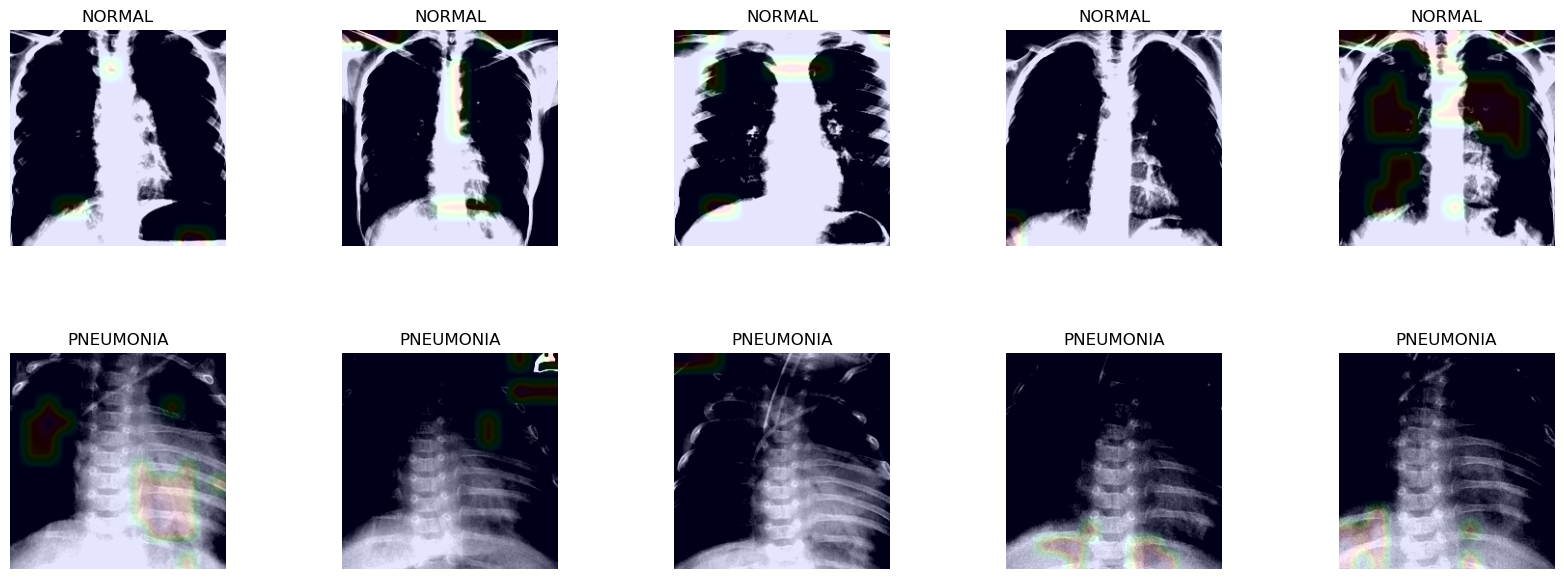

In [9]:
display_datasets_heatmap(grad_cam_model, dataloader_grad_cam, n=10)